In [116]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns

In [118]:
celldata = pd.read_csv('celldata.csv')
dmm1 = pd.read_csv('celldata.csv')
dmm2 = pd.read_csv('celldata.csv')
dmm3 = pd.read_csv('celldata.csv')
dmm4 = pd.read_csv('celldata.csv')
leftTesterOnly = pd.read_csv('celldata.csv')
rightTesterOnly = pd.read_csv('celldata.csv')


# All cell data (left tester and right tester, all cells) (80 rows, columns 1-64)
allCellData = celldata.iloc[:,:]

# DMM 1 (left tester cells 1-32) (first 40 rows, columns 1-32)
celldataDMM1 = dmm1.iloc[0:40,0:32]

# # DMM 2 (left tester cells 33-64) (first 40 rows, coulmns 33-64)
celldataDMM2 = dmm2.iloc[0:40,32:64]

# # DMM 3 (right tester cells 1-32) (last 40 rows, columns 1-32)
celldataDMM3 = dmm3.iloc[40:80,0:32]

# # DMM 4 (right tester cells 33-64) (last 40 rows, columns 33-64)
celldataDMM4 = dmm4.iloc[40:80,32:64]

# # LEFT TESTER (DMM 1 + DMM 2) (first 40 rows, columns 1-64)
celldataLeftTester = leftTesterOnly.iloc[0:40,0:64]

# # RIGHT TESTER (DMM 3 + DMM 4) (last 40 rows, columns 1-64)
celldataRightTester = rightTesterOnly.iloc[40:80,0:64]

meanCompareLeftRight = []
for col in celldataDMM1.columns:
    meanCompareLeftRight.append(abs((celldataDMM1[col].mean()-celldataDMM3[col].mean())*1000000))
    # print((celldataDMM1[col].mean()-celldataDMM3[col].mean())*1000000)

for col in celldataDMM2.columns:
    meanCompareLeftRight.append(abs((celldataDMM2[col].mean()-celldataDMM4[col].mean())*1000000))
    # print((celldataDMM2[col].mean()-celldataDMM4[col].mean())*1000000)


varianceAllCells = []
for col in celldata.columns:
    if celldata[col].mean() > 2:
        varianceAllCells.append(celldata[col].var())

vMeanAllCells = []
for col in celldata.columns:
    if celldata[col].mean() > 2:
        vMeanAllCells.append(celldata[col].mean())

In [120]:
# calculate mean of each column in data frame

meanListAllCells = []
for col in allCellData.columns:
    meanListAllCells.append(celldata[col].mean())

meanListDMM1 = []
for col in celldataDMM1.columns:
    meanListDMM1.append(celldataDMM1[col].mean())

meanListDMM2 = []
for col in celldataDMM2.columns:
    meanListDMM2.append(celldataDMM2[col].mean())

meanListDMM3 = []
for col in celldataDMM3.columns:
    meanListDMM3.append(celldataDMM3[col].mean())

meanListDMM4 = []
for col in celldataDMM4.columns:
    meanListDMM4.append(celldataDMM4[col].mean())

meanListLeftTester = []
for col in celldataLeftTester.columns:
    meanListLeftTester.append(celldataLeftTester[col].mean())

meanListRightTester = []
for col in celldataRightTester.columns:
    meanListRightTester.append(celldataRightTester[col].mean())

In [121]:
# normalize by dividing every value in each column by the column's mean (mul by 1M to get uV scale)
for i in range(0,len(allCellData.columns)):
    allCellData.iloc[:,i] = allCellData.iloc[:,i].div(meanListAllCells[i]).mul(1000000)

for i in range(0,len(celldataDMM1.columns)):
    celldataDMM1.iloc[:,i] = celldataDMM1.iloc[:,i].div(meanListDMM1[i]).mul(1000000)

for i in range(0,len(celldataDMM2.columns)):
    celldataDMM2.iloc[:,i] = celldataDMM2.iloc[:,i].div(meanListDMM2[i]).mul(1000000)

for i in range(0,len(celldataDMM3.columns)):
    celldataDMM3.iloc[:,i] = celldataDMM3.iloc[:,i].div(meanListDMM3[i]).mul(1000000)

for i in range(0,len(celldataDMM4.columns)):
    celldataDMM4.iloc[:,i] = celldataDMM4.iloc[:,i].div(meanListDMM4[i]).mul(1000000)

for i in range(0,len(celldataLeftTester.columns)):
    celldataLeftTester.iloc[:,i] = celldataLeftTester.iloc[:,i].div(meanListLeftTester[i]).mul(1000000)

for i in range(0,len(celldataRightTester.columns)):
    celldataRightTester.iloc[:,i] = celldataRightTester.iloc[:,i].div(meanListRightTester[i]).mul(1000000)


In [122]:
# plt.boxplot([celldata.CELL1, celldata.CELL2, celldata.CELL3]);

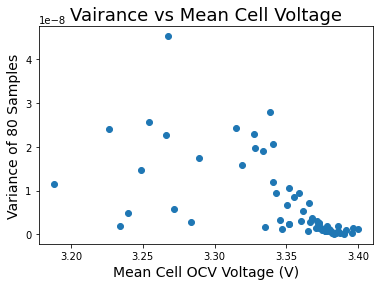

<Figure size 432x288 with 0 Axes>

In [123]:
plt.scatter(vMeanAllCells, varianceAllCells)
plt.xlabel('Mean Cell OCV Voltage (V)', fontsize = 14) 
plt.ylabel('Variance of 80 Samples', fontsize = 14) 
plt.title('Vairance vs Mean Cell Voltage', fontsize = 18) 
plt.show()
plt.savefig('mean_vs_variance.png', dpi=600)

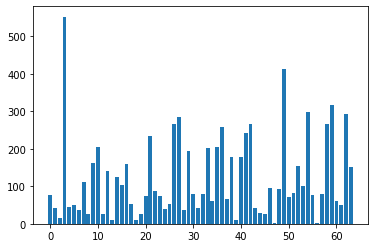

In [124]:
plt.bar(range(len(meanCompareLeftRight)),meanCompareLeftRight)
plt.show()

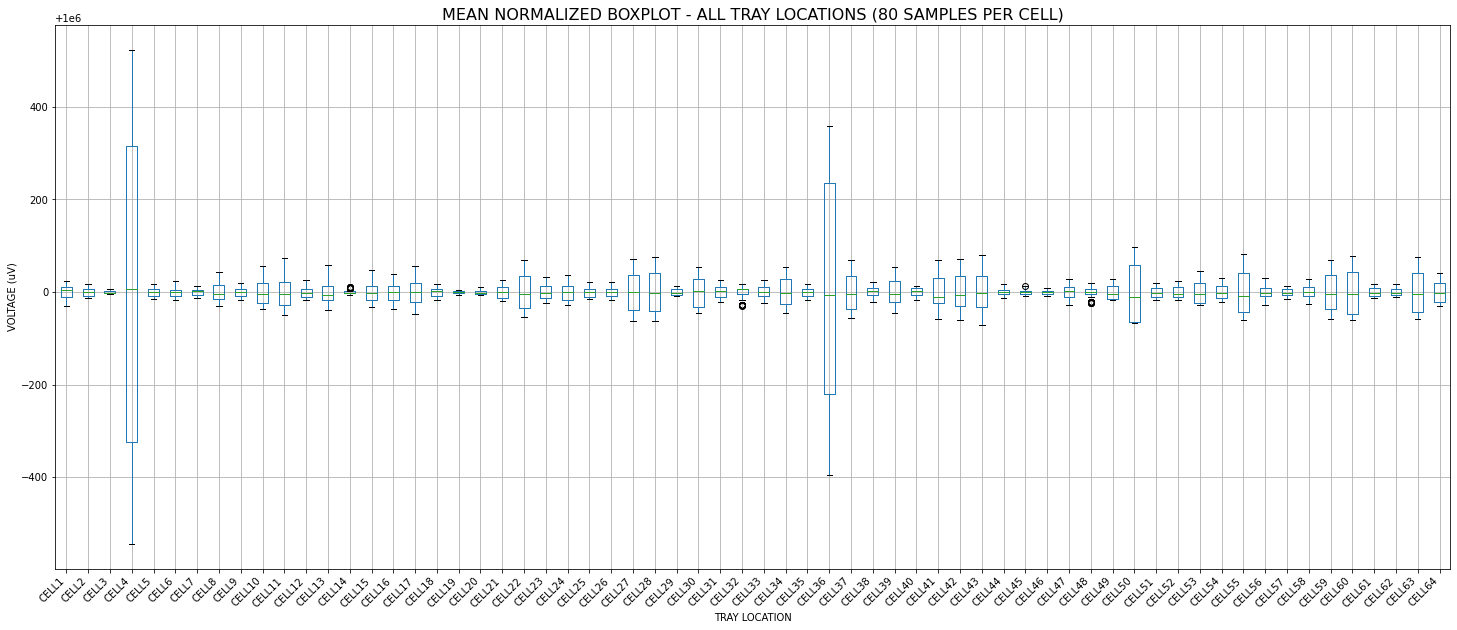

In [125]:
boxplot = celldata.boxplot(figsize=(25,10))
boxplot.set_title('MEAN NORMALIZED BOXPLOT - ALL TRAY LOCATIONS (80 SAMPLES PER CELL)', size = 16)
boxplot.set_xlabel('TRAY LOCATION')
boxplot.set_ylabel('VOLTAGE (uV)')
boxplot.get_yaxis().get_major_formatter().set_scientific(False)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')
boxplot.plot();


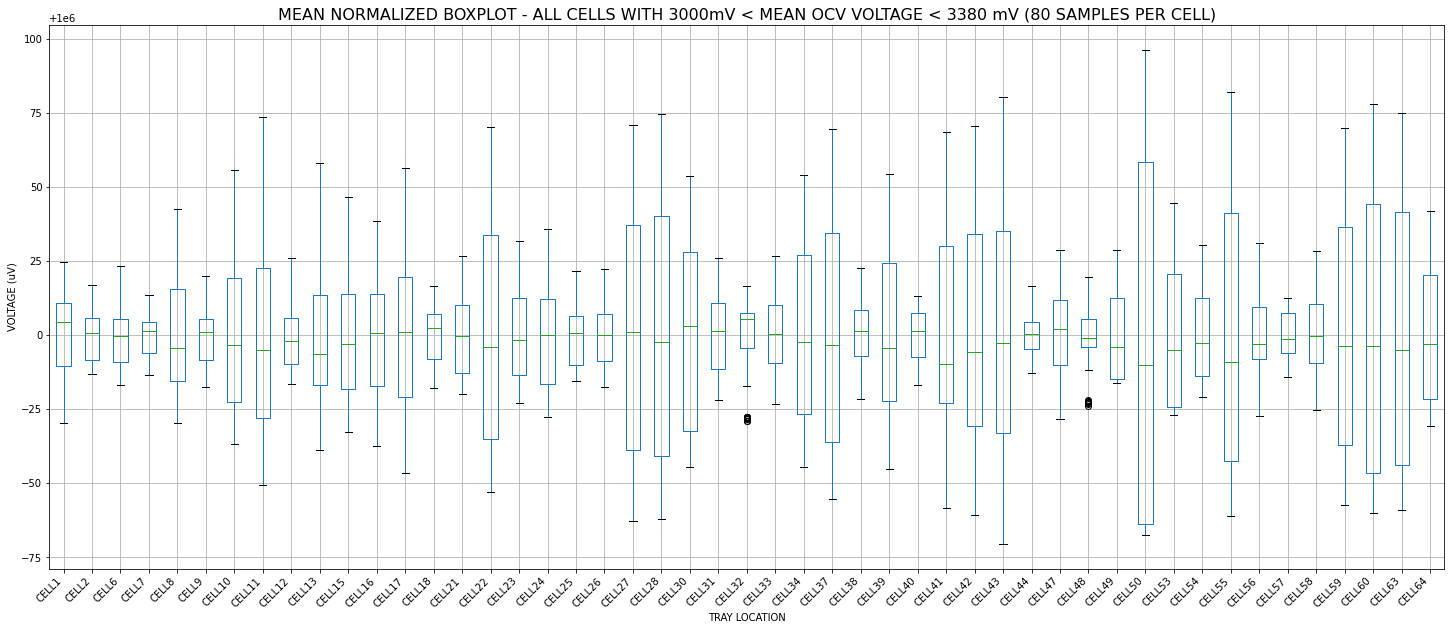

In [126]:
indexFilterList = []

for value in meanListAllCells:
    if value < 3.38 and value > 3.0:
        indexFilterList.append("CELL" + str(meanListAllCells.index(value)+1))
        
boxplot = celldata.boxplot(column=indexFilterList, figsize=(25,10))
boxplot.set_title('MEAN NORMALIZED BOXPLOT - ALL CELLS WITH 3000mV < MEAN OCV VOLTAGE < 3380 mV (80 SAMPLES PER CELL)', size = 16)
boxplot.set_xlabel('TRAY LOCATION')
boxplot.set_ylabel('VOLTAGE (uV)')
boxplot.get_yaxis().get_major_formatter().set_scientific(False)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')
boxplot.plot();

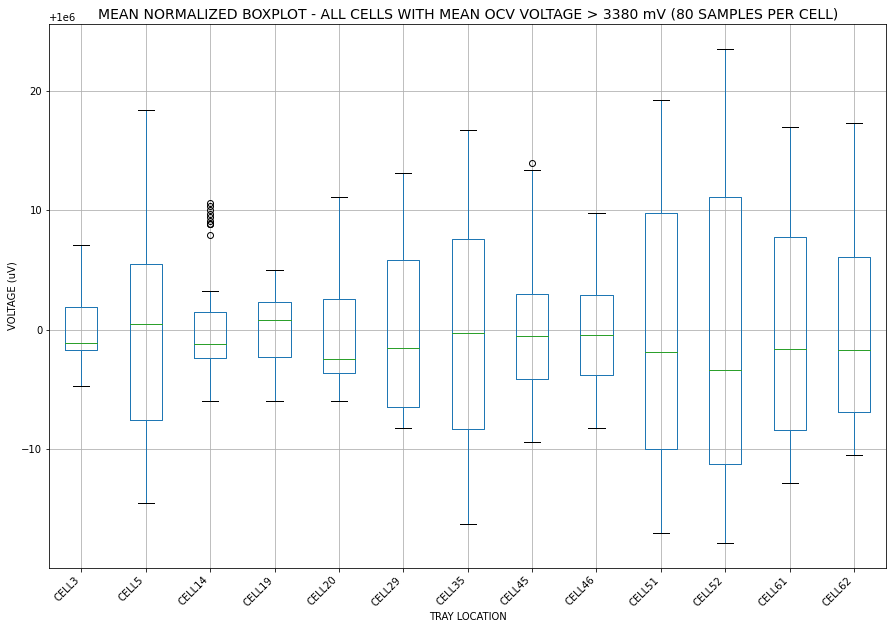

In [127]:
indexFilterList = []

for value in meanListAllCells:
    if value > 3.38:
        indexFilterList.append("CELL" + str(meanListAllCells.index(value)+1))
        
boxplot = celldata.boxplot(column=indexFilterList, figsize=(15,10))
boxplot.set_title('MEAN NORMALIZED BOXPLOT - ALL CELLS WITH MEAN OCV VOLTAGE > 3380 mV (80 SAMPLES PER CELL)', size = 14)
boxplot.set_xlabel('TRAY LOCATION')
boxplot.set_ylabel('VOLTAGE (uV)')
boxplot.get_yaxis().get_major_formatter().set_scientific(False)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')
boxplot.plot();

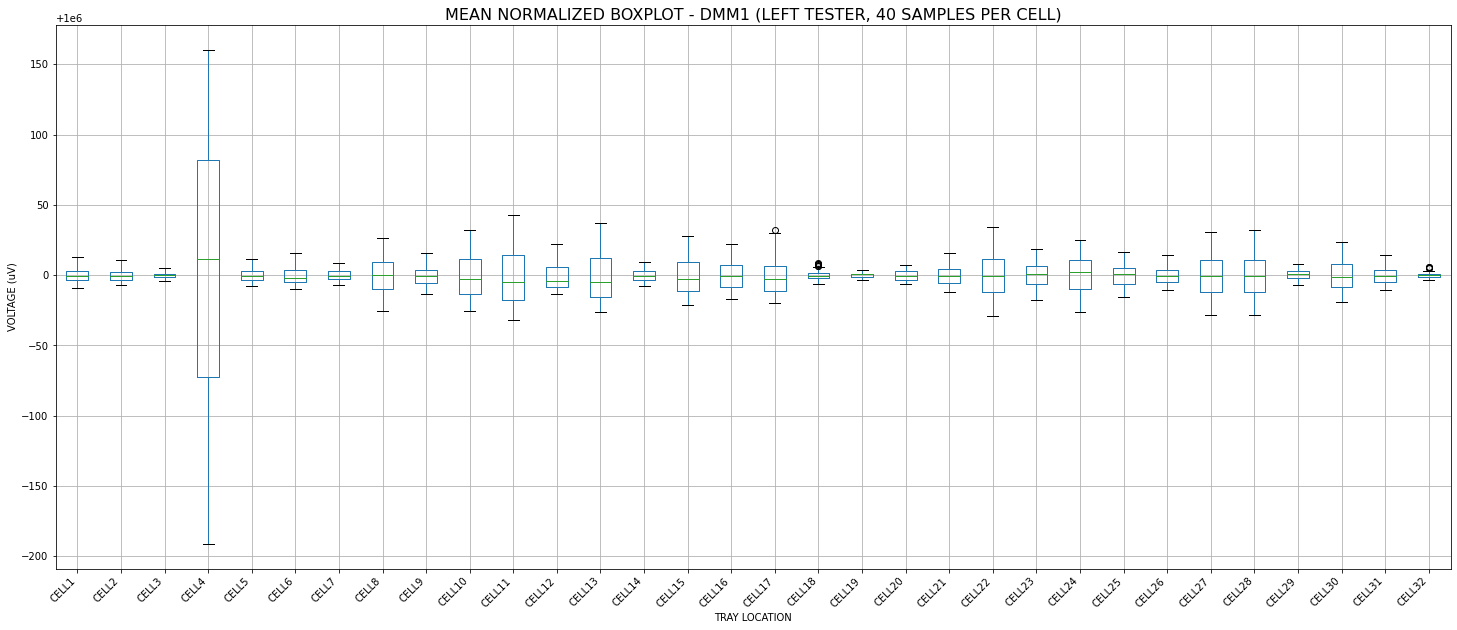

In [128]:
boxplot = celldataDMM1.boxplot(figsize=(25,10))
boxplot.set_title('MEAN NORMALIZED BOXPLOT - DMM1 (LEFT TESTER, 40 SAMPLES PER CELL)', size = 16)
boxplot.set_xlabel('TRAY LOCATION')
boxplot.set_ylabel('VOLTAGE (uV)')
boxplot.get_yaxis().get_major_formatter().set_scientific(False)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')
boxplot.plot();

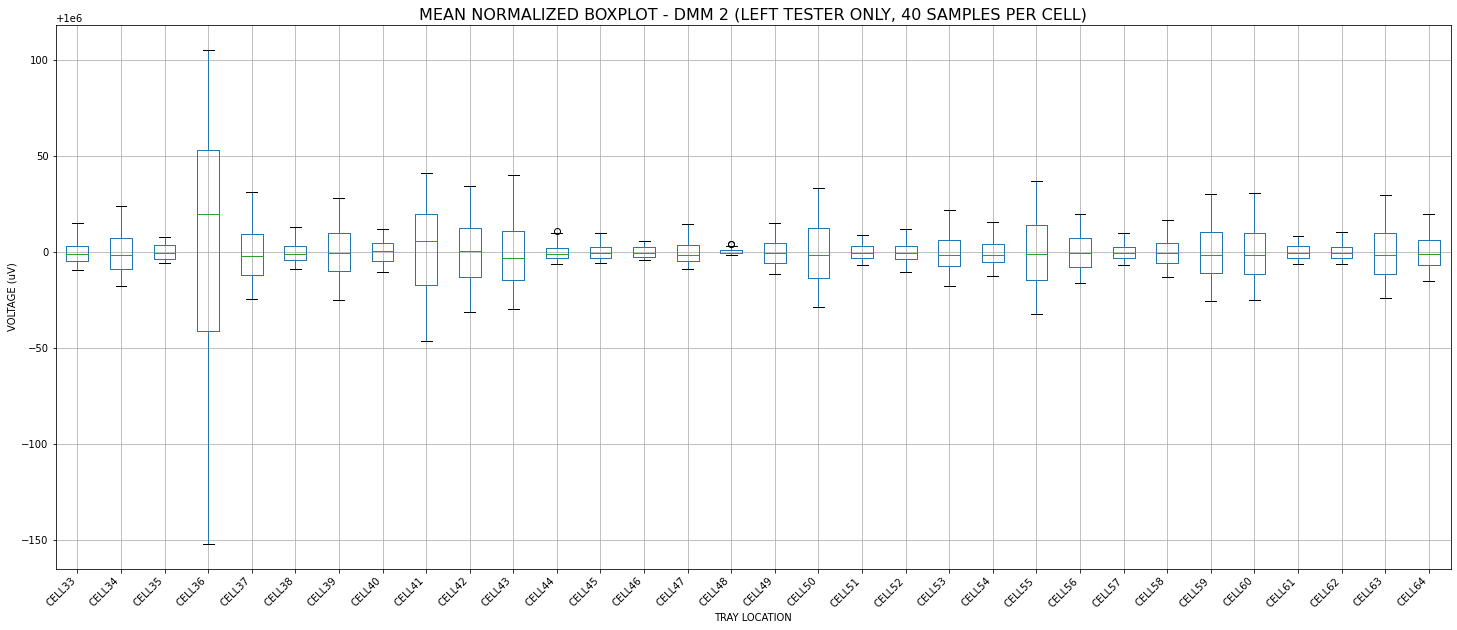

In [129]:
boxplot = celldataDMM2.boxplot(figsize=(25,10))
boxplot.set_title('MEAN NORMALIZED BOXPLOT - DMM 2 (LEFT TESTER ONLY, 40 SAMPLES PER CELL)', size = 16)
boxplot.set_xlabel('TRAY LOCATION')
boxplot.set_ylabel('VOLTAGE (uV)')
boxplot.get_yaxis().get_major_formatter().set_scientific(False)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')
boxplot.plot();

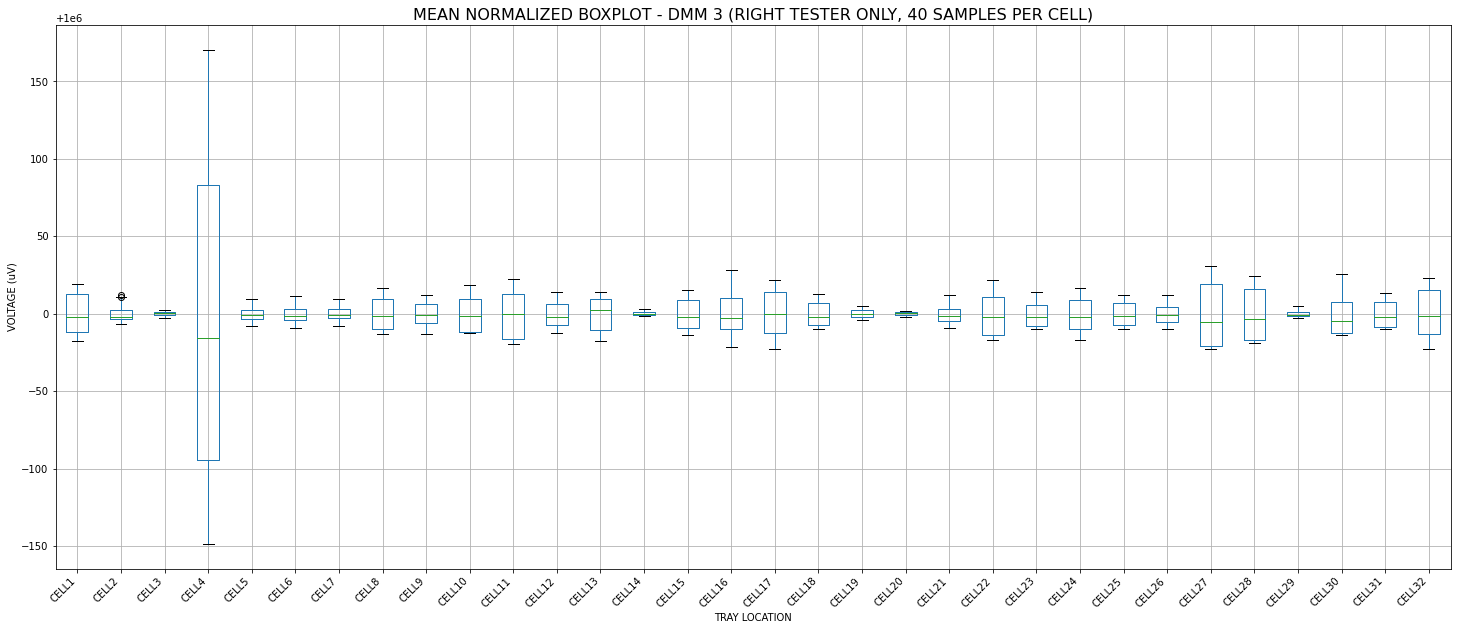

In [130]:
boxplot = celldataDMM3.boxplot(figsize=(25,10))
boxplot.set_title('MEAN NORMALIZED BOXPLOT - DMM 3 (RIGHT TESTER ONLY, 40 SAMPLES PER CELL)', size = 16)
boxplot.set_xlabel('TRAY LOCATION')
boxplot.set_ylabel('VOLTAGE (uV)')
boxplot.get_yaxis().get_major_formatter().set_scientific(False)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')
boxplot.plot();

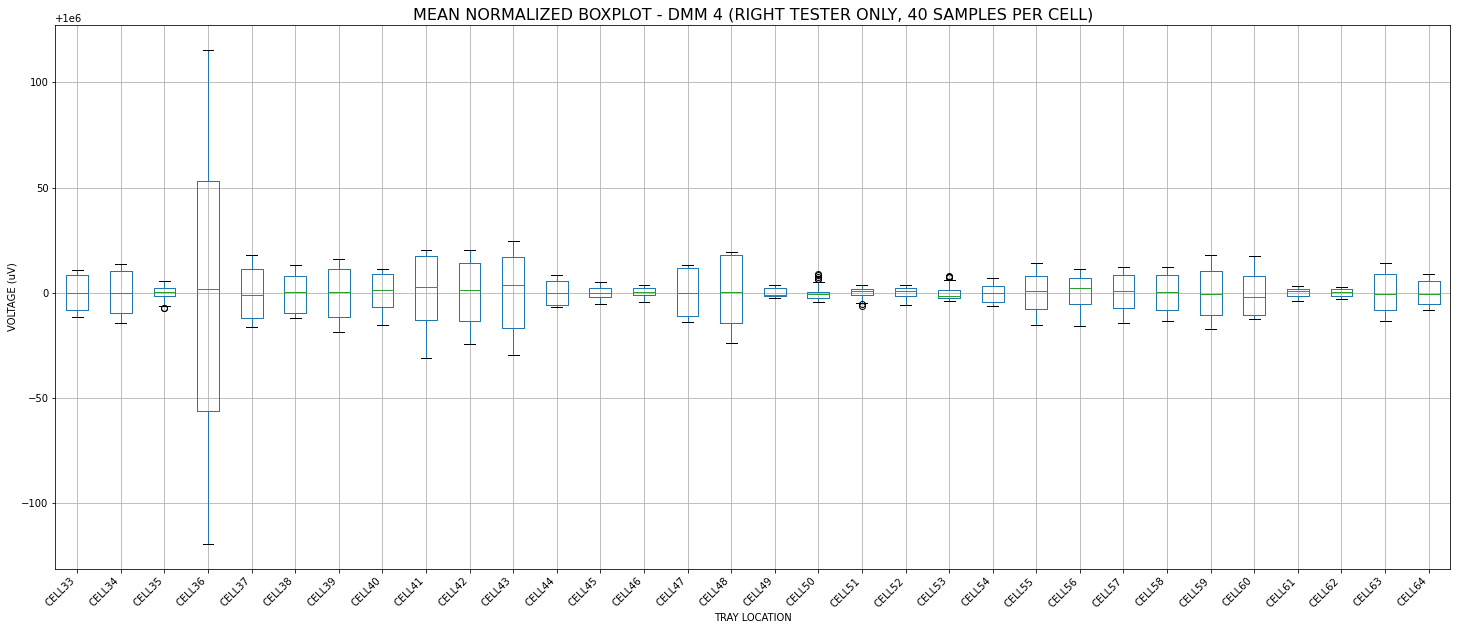

In [131]:
boxplot = celldataDMM4.boxplot(figsize=(25,10))
boxplot.set_title('MEAN NORMALIZED BOXPLOT - DMM 4 (RIGHT TESTER ONLY, 40 SAMPLES PER CELL)', size = 16)
boxplot.set_xlabel('TRAY LOCATION')
boxplot.set_ylabel('VOLTAGE (uV)')
boxplot.get_yaxis().get_major_formatter().set_scientific(False)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')
boxplot.plot();

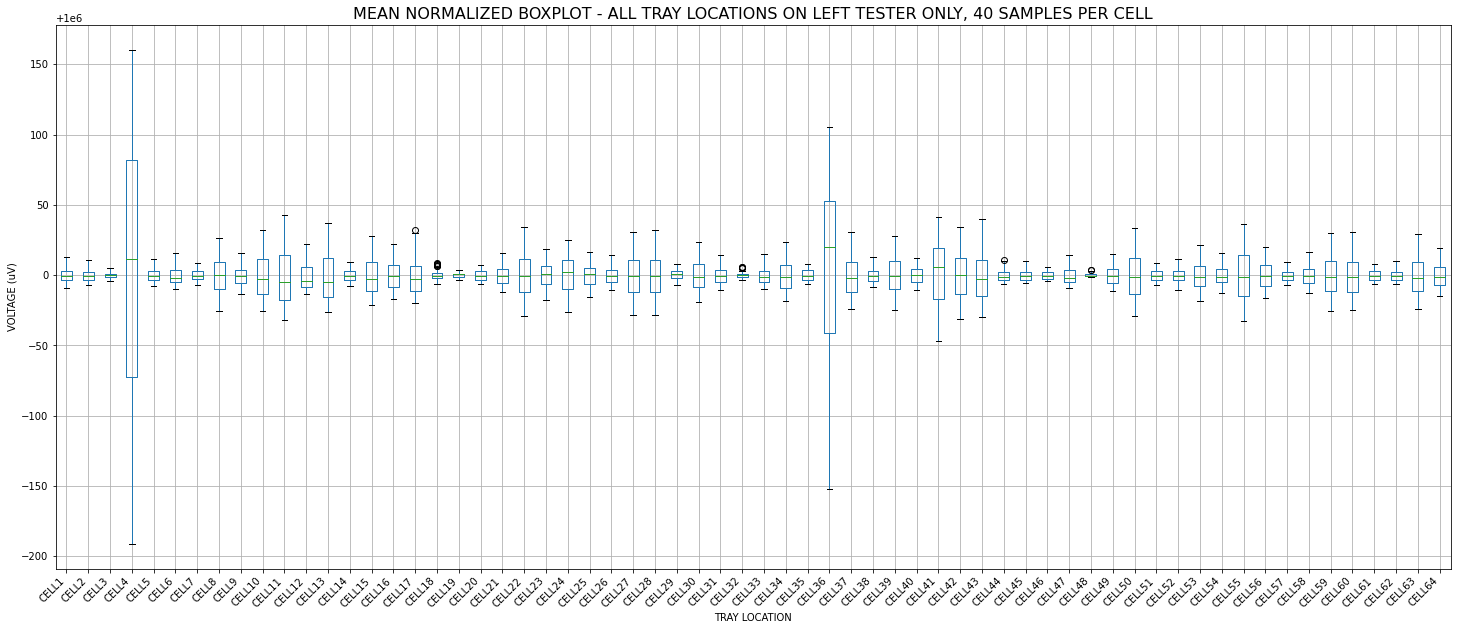

In [132]:
boxplot = celldataLeftTester.boxplot(figsize=(25,10))
boxplot.set_title('MEAN NORMALIZED BOXPLOT - ALL TRAY LOCATIONS ON LEFT TESTER ONLY, 40 SAMPLES PER CELL', size = 16)
boxplot.set_xlabel('TRAY LOCATION')
boxplot.set_ylabel('VOLTAGE (uV)')
boxplot.get_yaxis().get_major_formatter().set_scientific(False)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')
boxplot.plot();

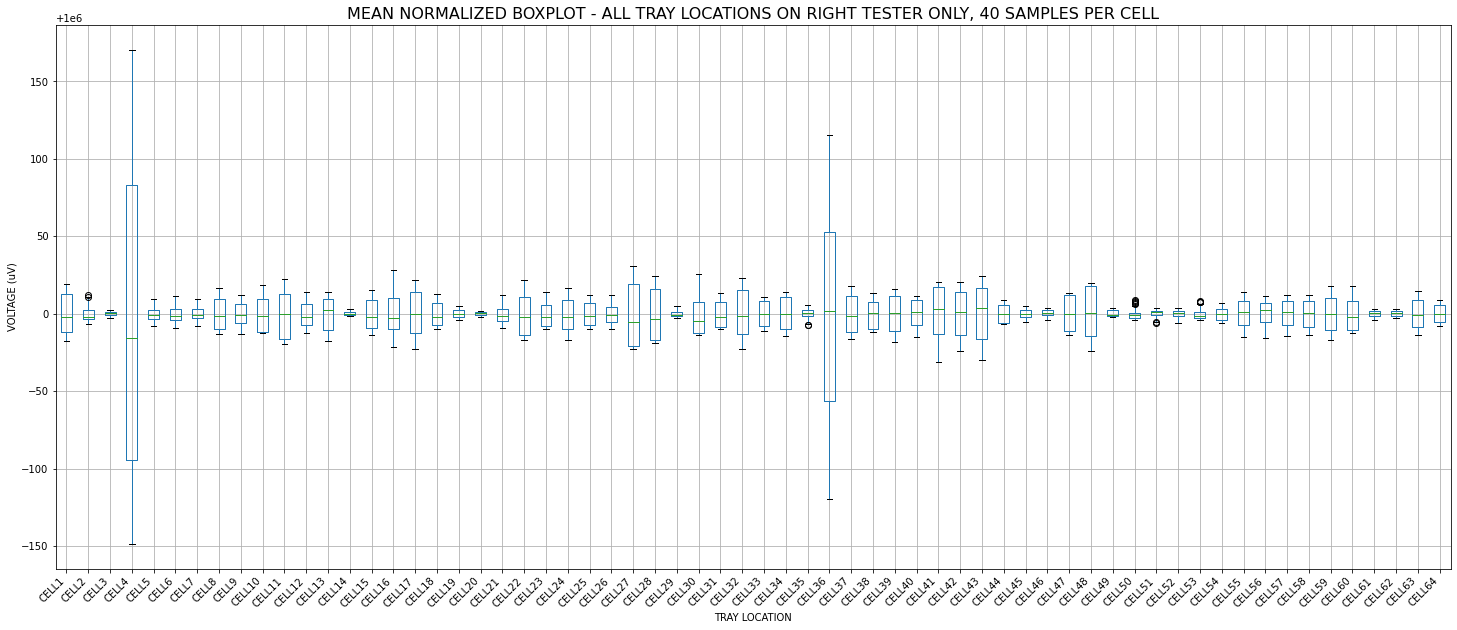

In [133]:
boxplot = celldataRightTester.boxplot(figsize=(25,10))
boxplot.set_title('MEAN NORMALIZED BOXPLOT - ALL TRAY LOCATIONS ON RIGHT TESTER ONLY, 40 SAMPLES PER CELL', size = 16)
boxplot.set_xlabel('TRAY LOCATION')
boxplot.set_ylabel('VOLTAGE (uV)')
boxplot.get_yaxis().get_major_formatter().set_scientific(False)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')
boxplot.plot();

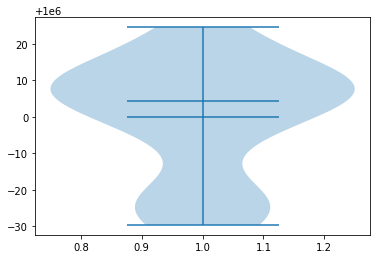

In [134]:
plt.violinplot([celldata.CELL1], showmeans=True, showmedians=True);

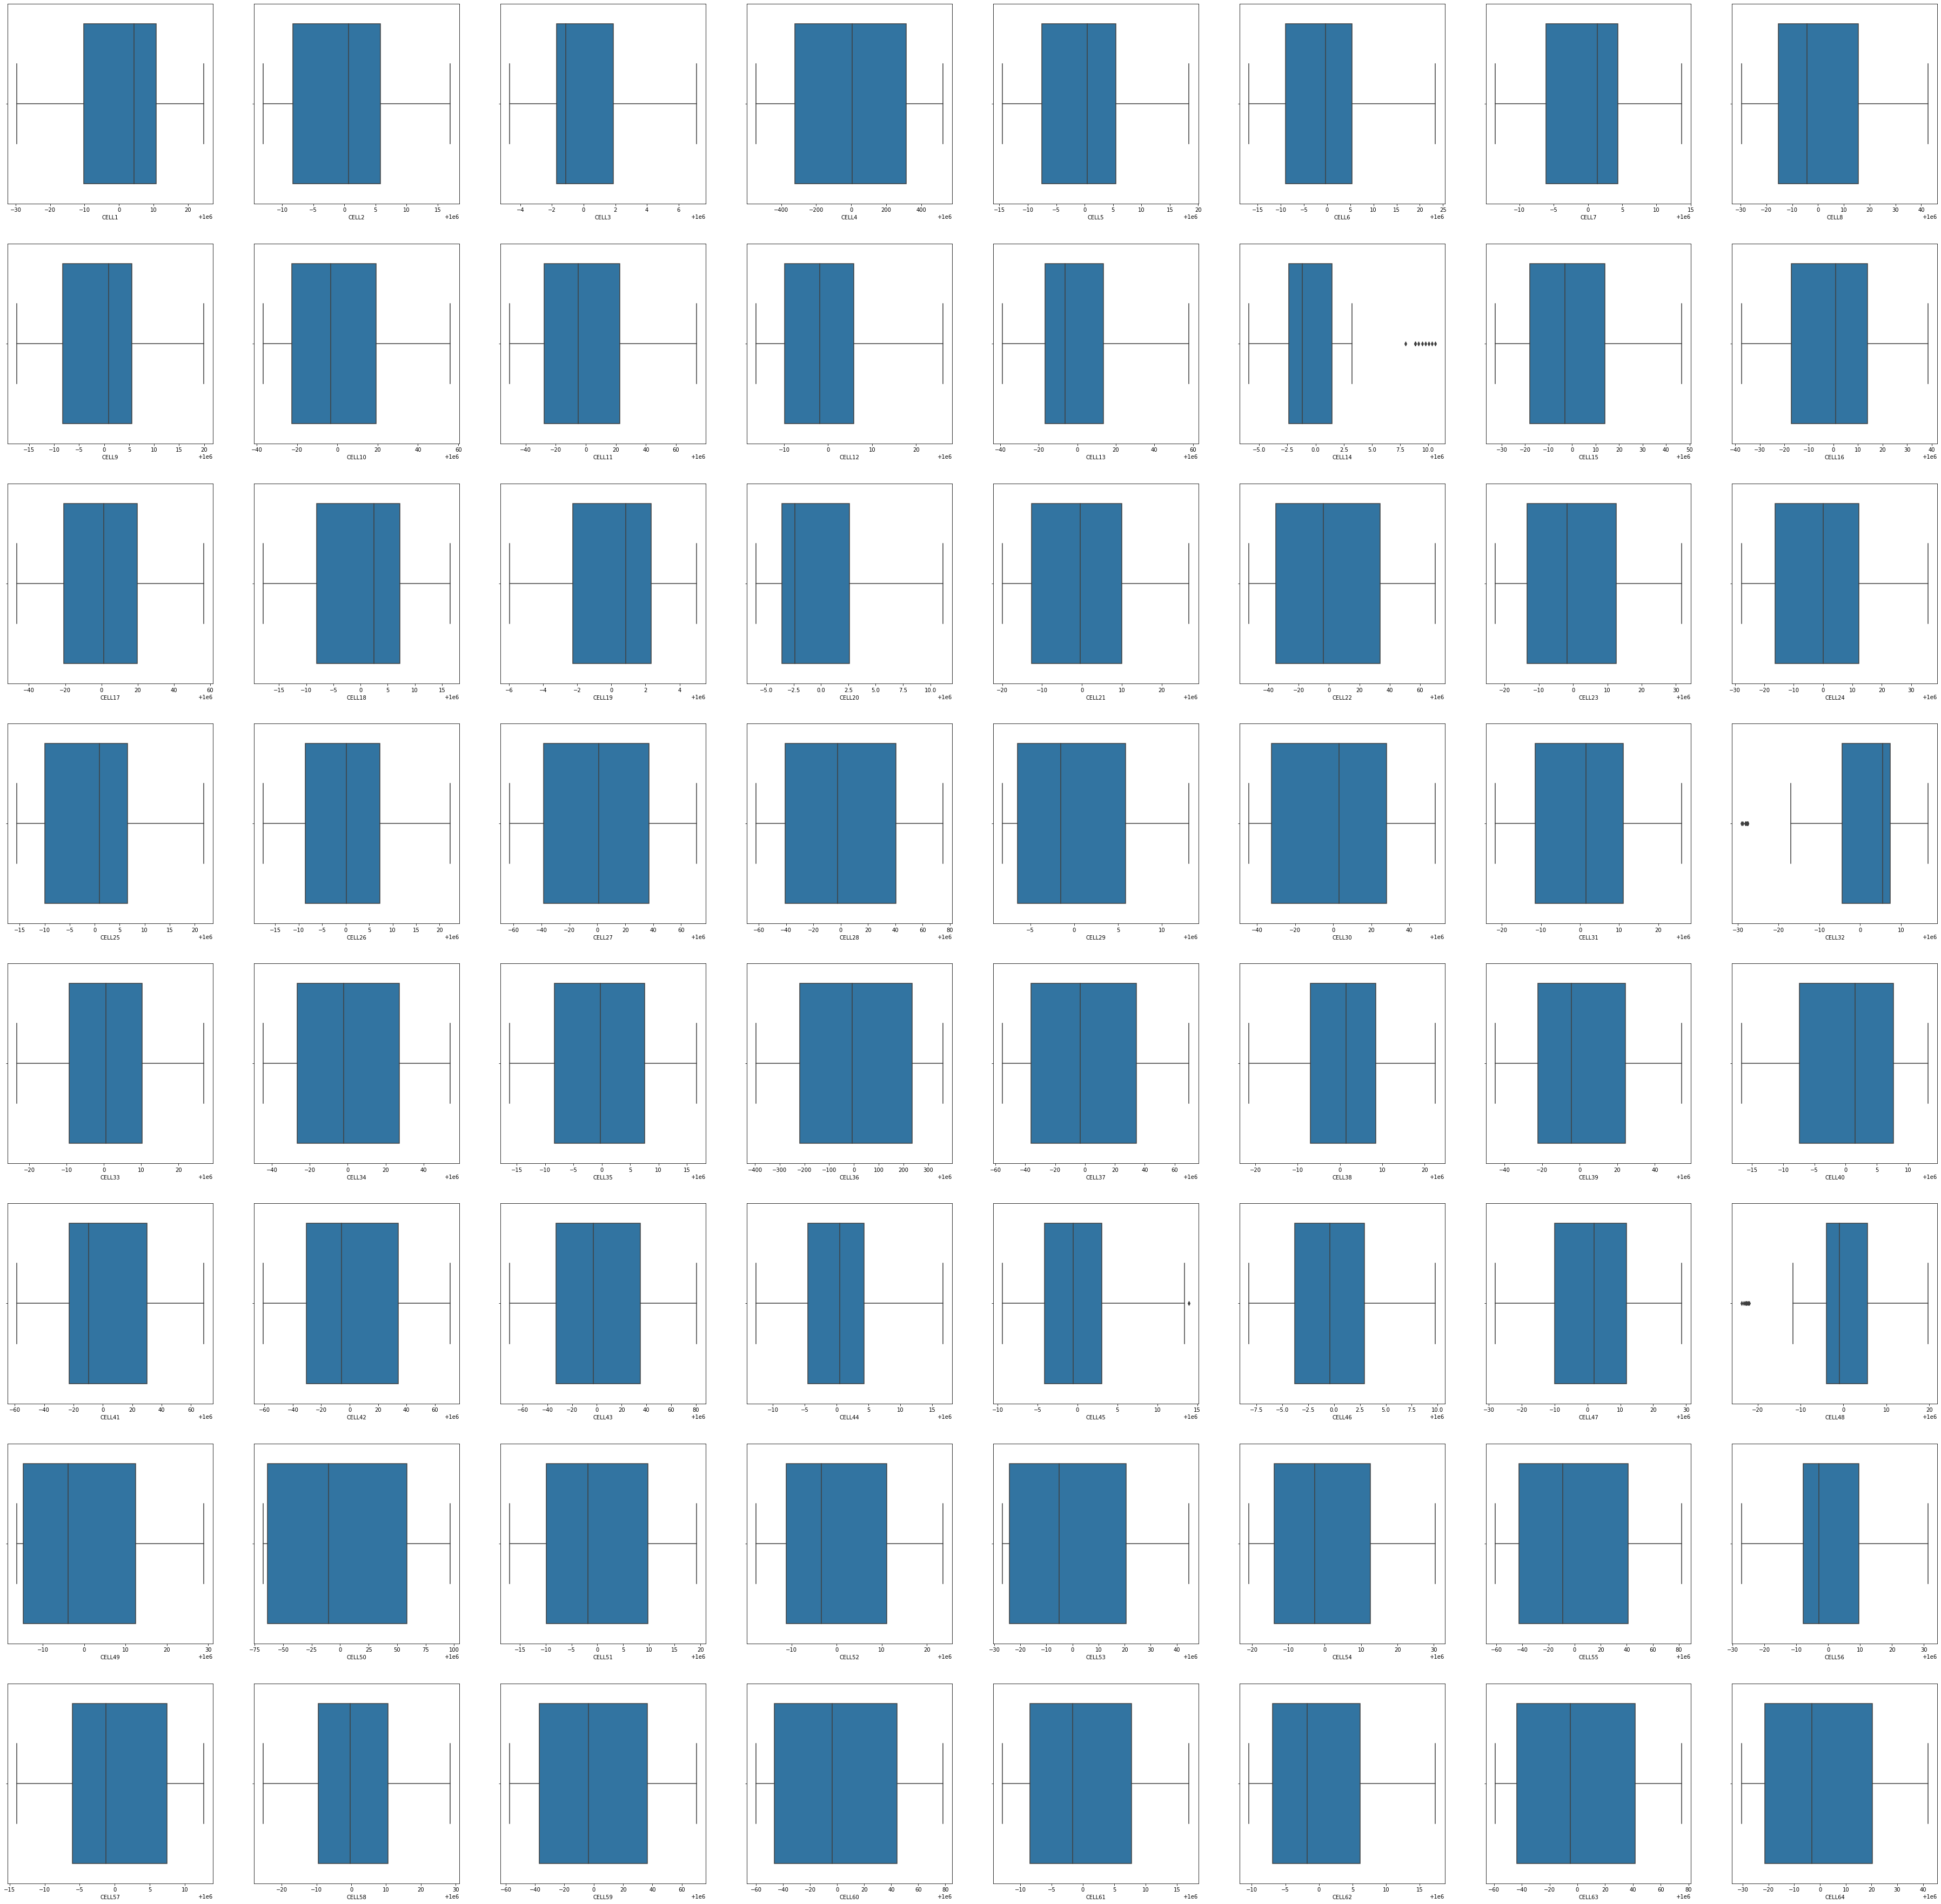

In [135]:
names = list(celldata.columns)

f, axes = plt.subplots(round(len(names)/8), 8, figsize=(64, 64)) 

y = 0;
for name in names:
    i, j = divmod(y, 8)
    sns.boxplot(x=celldata[name], ax=axes[i, j])
    y = y + 1

plt.show()